# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/tensorflow.git

Cloning into 'tensorflow'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 60311 (delta 32), reused 37 (delta 23), pack-reused 60260
Receiving objects: 100% (60311/60311), 442.46 MiB | 14.79 MiB/s, done.
Resolving deltas: 100% (82/82), done.
Checking out files: 100% (60225/60225), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [1]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

##Especificando la versión de TensorFlow

Ejecutando "importar tensorflow" importará la versión por defecto (actualmente 2.x). Puedes usar la 1.x ejecutando una celda con la "versión mágica de tensorflow" **antes de ejecutar "importar tensorflow".

### Si no funciona hacer el pip install


In [2]:
#!pip install tensorflow==1.14
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Importar Tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.15.2


In [4]:
session = tf.Session()

# Núcleos de convolución no lineales

$$\max \left(\sum_{i=1}^n b_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n y_i b_i k(x_i, x_j) y_j b_j\right)$$

sujeto a las restricciones
$$\sum_{i=1}^n b_i y_i = 0$$
$$0\le b_i\le \frac{1}{2n\gamma}$$

$k$ se denomina el núcleo (**kernel**) de la SVM
- Caso lineal $k(x_i,x_j) = x_i\cdot x_j$
- Caso general $k(x_i, x_j) = \phi(x_i)\cdot \phi(x_j)$

- Kernel Gaussiano: $k(x_i, x_j) = e^{-\gamma||x_i-x_j||^2}$
- Predicción: $k(x_i, p_j) = e^{-\gamma||x_i-p_j||^2}$

- Kernel polinomial homogéneo: $k(x_i, x_j)= (x_i\cdot x_j)^d$
- Kernel polinomial no homogéneo: $(x_i, x_j)= (x_i\cdot x_j +1)^d$
- Kernel de tangente hiperbólica: $(x_i, x_j)= tanh(a x_i\cdot x_j +k)$

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from sklearn import datasets

In [33]:
(x_vals, y_vals) = datasets.make_circles(n_samples=500, factor=0.5, noise=0.1)

In [34]:
x_vals

array([[-1.03647536e+00,  7.88836307e-02],
       [ 1.04926149e+00, -3.17979802e-01],
       [-3.29963898e-01,  1.42085363e-01],
       [-4.62196731e-01,  2.59695500e-01],
       [-6.83738299e-01,  4.32745559e-01],
       [-4.94098249e-01,  3.83797996e-01],
       [ 7.28255408e-01, -8.65595110e-01],
       [-1.08833535e-01,  4.68158874e-01],
       [ 1.52530397e-02,  9.60332055e-01],
       [ 3.47228595e-01,  2.45239446e-01],
       [ 4.92035068e-01, -6.68829595e-01],
       [-2.87722870e-01, -4.66472876e-02],
       [ 4.15217988e-01, -8.62669248e-01],
       [ 6.41996783e-01, -1.94489853e-01],
       [-9.38041426e-01, -2.94883187e-01],
       [ 2.82942659e-01,  1.09597079e+00],
       [-1.01356798e-01, -3.62304274e-01],
       [-2.45877986e-01, -5.59822340e-01],
       [ 6.35756635e-01,  9.84646486e-01],
       [ 2.17678443e-01,  4.66901727e-01],
       [-3.61096579e-01, -9.88454112e-01],
       [ 2.07227256e-01, -3.15481378e-01],
       [-7.23963947e-01,  6.78761456e-01],
       [ 2.

In [35]:
y_vals

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,

In [36]:
y_vals = np.array([1 if y == 1 else -1 for y in y_vals])

In [37]:
class1_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i]==1]
class1_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i]==1]

class2_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i]==-1]
class2_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i]==-1]

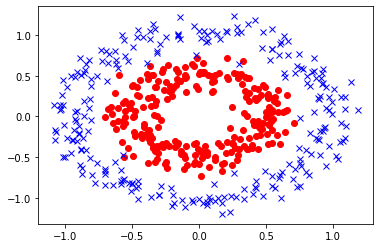

In [38]:
plt.plot(class1_x, class1_y, 'ro', label = "Clase 1")
plt.plot(class2_x, class2_y, 'bx', label = "Clase 2")
plt.show()

In [39]:
batch_size = 500
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 2], dtype = tf.float32)
b = tf.Variable(tf.random_normal(shape=[1, batch_size]))

In [40]:
gamma = tf.constant(-50.0)
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1,1])
sq_distance = tf.add(tf.subtract(dist, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(x_data)))), 
                     tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_distance)))

In [41]:
first_sum = tf.reduce_sum(b)
b_vect_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_sum = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vect_cross, y_target_cross)))
loss = tf.negative(tf.subtract(first_sum, second_sum))

In [42]:
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1), [-1, 1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid),1), [-1,1])

pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(prediction_grid)))), 
                      tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

In [43]:
prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target), b), pred_kernel)
prediction = tf.sign(prediction_output - tf.reduce_mean(prediction_output))

In [44]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))

In [45]:
my_optim = tf.train.GradientDescentOptimizer(0.002)
train_step = my_optim.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

In [46]:
loss_vect = []
batch_acc = []
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    
    
    acc_temp = session.run(accuracy, feed_dict={x_data: rand_x, y_target: rand_y, prediction_grid:rand_x})
    batch_acc.append(acc_temp)
    
    if(i+1)%50==0:
        print("Paso #"+str(i+1)+ ", Pérdida = "+str(temp_loss)+", Precisión = "+str(acc_temp))

Paso #50, Pérdida = 317.98654, Precisión = 0.592
Paso #100, Pérdida = 160.61697, Precisión = 0.602
Paso #150, Pérdida = 130.8702, Precisión = 0.67
Paso #200, Pérdida = 68.72821, Precisión = 0.654
Paso #250, Pérdida = 48.58746, Precisión = 0.688
Paso #300, Pérdida = 29.47425, Precisión = 0.748
Paso #350, Pérdida = 15.732904, Precisión = 0.792
Paso #400, Pérdida = -1.9516201, Precisión = 0.87
Paso #450, Pérdida = -0.93644524, Precisión = 0.88
Paso #500, Pérdida = -3.0817623, Precisión = 0.934
Paso #550, Pérdida = -4.8958416, Precisión = 0.91
Paso #600, Pérdida = -7.9032097, Precisión = 0.992
Paso #650, Pérdida = -10.690641, Precisión = 0.982
Paso #700, Pérdida = -10.735811, Precisión = 0.976
Paso #750, Pérdida = -11.188683, Precisión = 0.992
Paso #800, Pérdida = -12.203281, Precisión = 0.982
Paso #850, Pérdida = -12.199981, Precisión = 0.988
Paso #900, Pérdida = -12.727067, Precisión = 0.994
Paso #950, Pérdida = -12.409709, Precisión = 0.998
Paso #1000, Pérdida = -13.120689, Precisión = 

In [47]:
x_min, x_max = x_vals[:,0].min()-1, x_vals[:,0].max()+1
y_min, y_max = x_vals[:,1].min()-1, x_vals[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

grid_points = np.c_[xx.ravel(), yy.ravel()]

In [48]:
grid_points

array([[-2.08502454, -2.19827077],
       [-2.06502454, -2.19827077],
       [-2.04502454, -2.19827077],
       ...,
       [ 2.13497546,  2.22172923],
       [ 2.15497546,  2.22172923],
       [ 2.17497546,  2.22172923]])

In [49]:
[grid_predictions] = session.run(prediction, feed_dict={x_data: x_vals,
                                                   y_target: np.transpose([y_vals]),
                                                   prediction_grid: grid_points})

In [50]:
grid_predictions

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [51]:
grid_predictions = grid_predictions.reshape(xx.shape)

In [52]:
grid_predictions

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

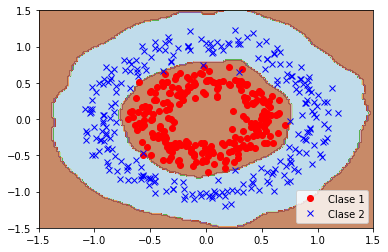

In [53]:
plt.contourf(xx,yy, grid_predictions, cmap = plt.cm.Paired, alpha = 0.7)
plt.plot(class1_x, class1_y, 'ro', label="Clase 1")
plt.plot(class2_x, class2_y, 'bx', label="Clase 2")
plt.legend(loc="lower right")
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

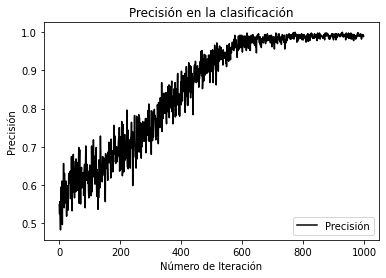

In [54]:
plt.plot(batch_acc, 'k-', label="Precisión")
plt.title("Precisión en la clasificación")
plt.xlabel("Número de Iteración")
plt.ylabel("Precisión")
plt.legend(loc="lower right")
plt.show()

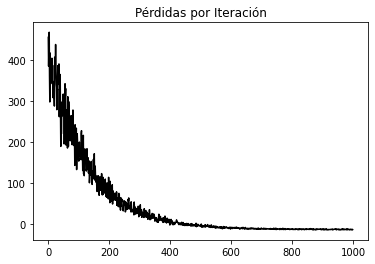

In [55]:
plt.plot(loss_vect, 'k-')
plt.title("Pérdidas por Iteración")
plt.show()

In [56]:
import sympy
sympy.binomial(4,1)

4